Importing dependencies for nlp,ml

In [23]:
import pandas as pd
import numpy as np

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset

In [9]:
df = pd.read_csv("news_dataset.csv")

understanding the dataset and checking the balance between the fake and real


In [10]:
df.head()
df.info()
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


,count
label,
FAKE,1877
REAL,1852


Text Cleaning Function

In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [28]:
df['text'] = df['text'].apply(clean_text)


Split Data

In [30]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


TF-IDF Vectorization

In [31]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.7,
    min_df=2
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Train the Model (Logistic Regression)

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Predictions & Accuracy

In [33]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9932885906040269


Model Evaluation

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[373   2]
 [  3 367]]
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99       375
        REAL       0.99      0.99      0.99       370

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



Visualize confusion matrix:

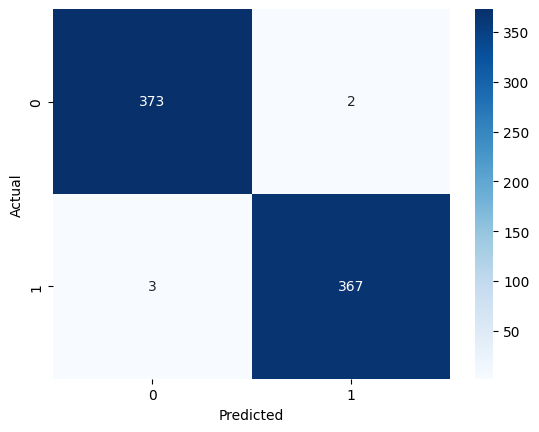

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
df['label'].value_counts(normalize=True)


,proportion
label,
FAKE,0.502822
REAL,0.497178
